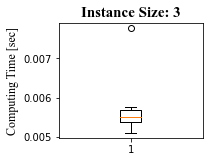

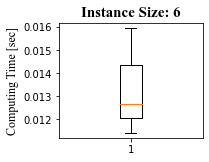

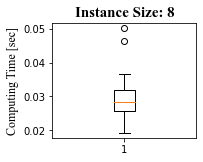

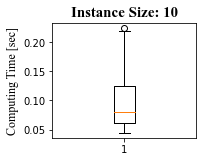

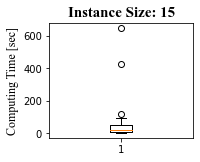

In [2]:
# Import libraries
curr_dir='/Users/felix/sciebo/masterarbeit/progra/model-based_rl'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
font = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        } 
font_2 = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'bold',
        'size': 15,
        }
def csv_to_data(path):
        # Creating dataset
        df=pd.read_csv(path).transpose()
        #print(df[0])
        return df[0][1:].values.astype(np.float64)
data_ref = np.random.normal(100, 10, 200)
data_1 = csv_to_data('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/output3.csv')
data_2 = csv_to_data('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/output6.csv')
data_3 = csv_to_data('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/output8.csv')
data_4 = csv_to_data('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/output10.csv')
data_5 = csv_to_data('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/output15.csv')
size=[3,6,8,10,15]

data = [data_1, data_2, data_3, data_4, data_5]

for datum,size_i in zip(data,size): 
        fig = plt.figure(figsize =(2, 1.6))
        
        # Creating axes instance
        ax = fig.add_axes([0, 0, 1, 1])
        
        # Creating plot
        bp = ax.boxplot(datum)
        #plt.xlabel('Size: '+str(size_i), fontdict=font)
        plt.ylabel('Computing Time [sec]', fontdict=font)

        # show plot
        plt.title(f"Instance Size: {size_i}", fontdict=font_2)

        fig.savefig("box_plot_small_exact_out"+str(size_i)+".svg", bbox_inches="tight", pad_inches=0)
        #fig.savefig("test.svg", format="svg")
        plt.show()

/Users/felix/miniconda3/envs/customjssp/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


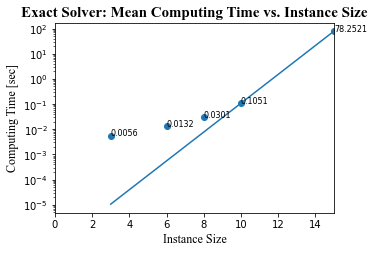

In [3]:
from scipy.optimize import curve_fit
def func(x, a, b, c, d):
    #return a*x**3 + b*x**2 +c*x + d
    return a * np.exp(b * x) 


"""
make the curve_fit
"""

font = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        } 

font_2 = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'bold',
        'size': 15,
        } 
fig, ax = plt.subplots(figsize=(5,3.5))
ax.set_yscale('log')
mean=[]
size=[3,6,8,10,15]

size_2=size
#mean.append(0)
for datum in data:
    mean.append(round(datum.mean(),4))
plt.scatter(size_2, mean)

z = np.polyfit((size_2), mean, 2)
#p = np.poly1d(z)
#p = scipy.optimize.curve_fit(lambda t,a,b: a+b*np.log(t),  size,  mean)
x = np.array(size_2, dtype=float) #transform your data in a numpy array of floats 
y = np.array(mean, dtype=float) #transform your data in a numpy array of floats 

popt, pcov = curve_fit(func, x, y,maxfev=10000)
plt.xlabel('Instance Size', fontdict=font)
plt.ylabel('Computing Time [sec]', fontdict=font)
for index in range(len(size_2)):
    ax.text(size_2[index], mean[index], mean[index], size=8)  
# giving a title to my graph
plt.title('Exact Solver: Mean Computing Time vs. Instance Size', fontdict=font_2)
#plt.plot(size,p(size))
#plt.plot(p)

plt.plot(x, func(x, *popt), label="Fitted Curve") 
plt.xlim([0,15])

fig.savefig("log_different_instances"+".svg", bbox_inches="tight", pad_inches=0)


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
def csv_to_data(path):
        # Creating dataset
        df=pd.read_csv(path)
        #print(df[0])
        return df#[0][1:].values()
        
font = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        } 

font_2 = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'bold',
        'size': 15,
        } 
linestyle_tuple = [
        ('solid','solid'),
        ('dotted','dotted'),
        ('dashed','dashed'),
        ('dashdot','dashdot'),
        ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1))),
        ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),

     ('loosely dotted',        (0, (1, 10))),
     #('dotted',                (0, (1, 1))),
     #('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     #('loosely dashed',        (0, (5, 10))),
     #('dashed',                (0, (5, 5))),
     #('densely dashed',        (0, (5, 1))),

     #('loosely dashdotted',    (0, (3, 10, 1, 10))),
     #('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ]

In [5]:
time_results=csv_to_data('resultsonly_time.csv')

fig, ax = plt.subplots(figsize=(5,3.5))
x=[3,6,8,10,15]
y=[round(i,4) for i in time_results['time']]
plt.scatter(x, y)

z = np.polyfit(x, y, 2)
p = np.poly1d(z)
plt.xlabel('Instance Size', fontdict=font)
plt.ylabel('Computing Time [sec]', fontdict=font)
for index in range(len(x)):
    ax.text(x[index], y[index], y[index], size=8)  
plt.title('AlphaZero Computing Time with 100 parallel simulations', fontdict=font_2)
plt.plot(x,p(x))
plt.xlim([0,15])
fig.savefig("different_instances_AlphaZero"+".svg", bbox_inches="tight", pad_inches=0)

FileNotFoundError: [Errno 2] No such file or directory: 'resultsonly_time.csv'

Index(['Unnamed: 0', '3x3x3/3x3_0_inst.json', '3x3x3/3x3_0_inst.json.1',
       '3x3x3/3x3_0_inst.json.2', '3x3x3/3x3_0_inst.json.3',
       '6x6x6/6x6_0_inst.json', '6x6x6/6x6_0_inst.json.1',
       '6x6x6/6x6_0_inst.json.2', '6x6x6/6x6_0_inst.json.3',
       '8x8x8/8x8_0_inst.json', '8x8x8/8x8_0_inst.json.1',
       '8x8x8/8x8_0_inst.json.2', '8x8x8/8x8_0_inst.json.3',
       '10x10x10/10x10_0_inst.json', '10x10x10/10x10_0_inst.json.1',
       '10x10x10/10x10_0_inst.json.2', '10x10x10/10x10_0_inst.json.3',
       '15x15x15/15x15_0_inst.json', '15x15x15/15x15_0_inst.json.1',
       '15x15x15/15x15_0_inst.json.2', '15x15x15/15x15_0_inst.json.3'],
      dtype='object')


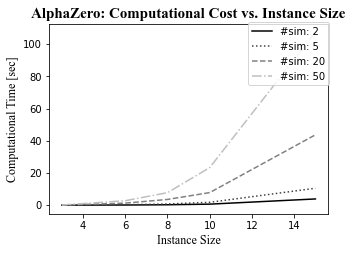

In [ ]:
def csv_to_data(path):
        # Creating dataset
        df=pd.read_csv(path)
        #print(df[0])
        return df#[0][1:].values()
time_results=csv_to_data('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/resultsonly_time.csv')
df=csv_to_data('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/figures/times_over_different_sims.csv')
fig, ax = plt.subplots(figsize=(5,3.5))
del_string='/Users/felix/sciebo/masterarbeit/progra/model-based_rl/resources/jsp_instances/ima/'
df.columns = df.columns.str.replace(del_string,'')
print(df.keys())
#action_times=df[2,:]
key_3=[]
key_6=[]
key_8=[]
key_10=[]
key_15=[]
x=[2,5,20,50]
sizes=[3,6,8,10,15]
for k in df.keys():
    if '3x3' in k:
        key_3.append(float(df[k][2]))
    
    elif '6x6' in k:
        key_6.append(float(df[k][2]))
    elif '8x8' in k:
        key_8.append(float(df[k][2]))
    elif '10x10' in k:
        key_10.append(float(df[k][2]))
    elif '15x15' in k:    
        key_15.append(float(df[k][2]))
gray_tone=(1/4)
# plt.plot(x,key_3)
# plt.plot(x,key_6)
# plt.plot(x,key_8)
# plt.plot(x,key_10)
# plt.plot(x,key_15)
for i in range(len(key_3)):
    plt.plot(sizes,[key_3[i],key_6[i],key_8[i],key_10[i],key_15[i]],label=f"#sim: {x[i]}",linestyle=linestyle_tuple[i][1],color=(gray_tone*i,gray_tone*i,i*gray_tone))
ax.set_xlabel('Instance Size', fontdict=font)
ax.set_ylabel('Computational Time [sec]', fontdict=font)
#fig.legend(loc=5)
plt.legend(loc=5,bbox_to_anchor=(1.02,0.84))
plt.title(f"AlphaZero: Computational Cost vs. Instance Size", fontdict=font_2)

fig.show
fig.savefig("comp_cost_over_diff_instances"+".svg", bbox_inches="tight", pad_inches=0)



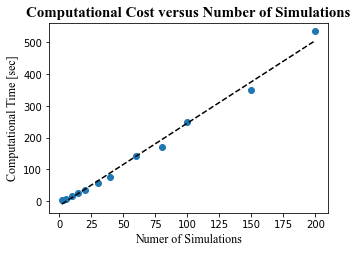

In [ ]:
import ast
fig, ax = plt.subplots(figsize=(5,3.5))

num_sims=[2,3,5,10,15,20,30,40,60,80,100,150,200,500]

df=csv_to_data('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/different_num_sims_az_0_puct.csv')
reward_list=ast.literal_eval(df['500'][0])
action_time_list=ast.literal_eval(df['500'][1])
cum_action_time=[sum(li) for li in action_time_list]
#plt.plot(num_sims,reward_list)
x=num_sims[:-1]
y=cum_action_time[:-1]
plt.scatter(x,y)
z = np.polyfit(x, y, 1)
trendline = np.poly1d(z)

plt.plot(x, trendline(x), 'k--')
plt.title('Computational Cost versus Number of Simulations', fontdict=font_2)
ax.set_xlabel('Numer of Simulations', fontdict=font)
ax.set_ylabel('Computational Time [sec]', fontdict=font)
plt.show()
fig.savefig("cum_cost_num_simsv2"+".svg", bbox_inches="tight", pad_inches=0)


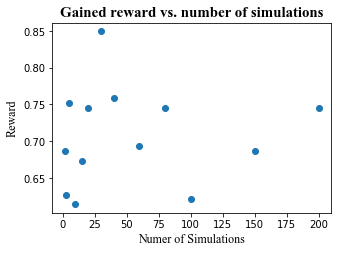

In [ ]:
import ast
fig, ax = plt.subplots(figsize=(5,3.5))

num_sims=[2,3,5,10,15,20,30,40,60,80,100,150,200,500]

df=csv_to_data('different_num_sims_az_0_puct.csv')
reward_list=ast.literal_eval(df['500'][0])
action_time_list=ast.literal_eval(df['500'][1])
cum_action_time=[sum(li) for li in action_time_list]
#plt.plot(num_sims,reward_list)
x=num_sims[:-1]
y=reward_list[:-1]
plt.scatter(x,y)
z = np.polyfit(x, y, 1)
trendline = np.poly1d(z)

plt.title('Gained reward vs. number of simulations', fontdict=font_2)
ax.set_xlabel('Numer of Simulations', fontdict=font)
ax.set_ylabel('Reward', fontdict=font)
plt.show()
fig.savefig("reward_num_sims"+".svg", bbox_inches="tight", pad_inches=0)

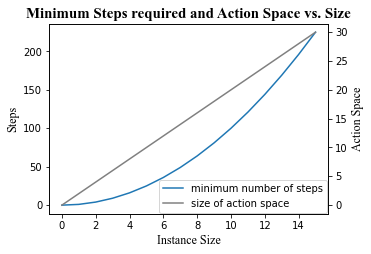

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
fig, ax = plt.subplots(figsize=(5,3.5))

# Define the arrays of data points
x = [i for i in range(16)]
#y = mean[1:]

def y_fun(x):
  return x*x

def y_fun_2(x):
  return 2*x

y = [y_fun(i) for i in x ]

y_2 = [y_fun_2(i) for i in x ]

# Define the function that describes the general form of the trendline
#def polynomial_trendline(x, a, b, c, d):
#  return a * x**3 + b * x**2 + c * x + d

# Fit the trendline to the data
#parameters, _ = curve_fit(polynomial_trendline, x, y)
#a, b, c, d = parameters

# Print the equation of the trendline
#print(f'y = {a:.4f} * x**3 + {b:.4f} * x**2 + {c:.4f} * x + {d:.4f}')
#y_2=[polynomial_trendline(x,a,b,c,d) for x in x ]
ax.plot(x,y,label='minimum number of steps')
ax2=ax.twinx()
ax2.plot(x,y_2,color='gray',label='size of action space')
ax.set_xlabel('Instance Size', fontdict=font)
ax.set_ylabel('Steps', fontdict=font)
ax2.set_ylabel('Action Space', fontdict=font)


# giving a title to my graph
#plt.title('Quadratic Growth of min. needed Steps', fontdict=font_2)
plt.title('Minimum Steps required and Action Space vs. Size', fontdict=font_2)
fig.legend(bbox_to_anchor=(0.91, 0.11), loc=4, ncol=1)
plt.show()
fig.savefig("quadratic_growth_min_stepsv2"+".svg", bbox_inches="tight", pad_inches=0)

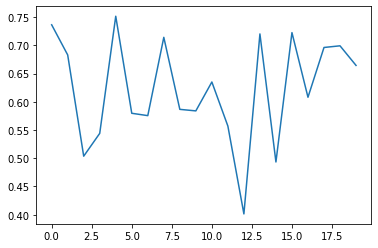

In [ ]:
import json
with open("every_action.json", 'r') as f:
    every_action = json.load(f)

with open("every_action_time.json", 'r') as f:
    every_action_time = json.load(f)

with open("train_rewards.json", 'r') as f:
    train_rewards = json.load(f)

plt.plot(train_rewards)

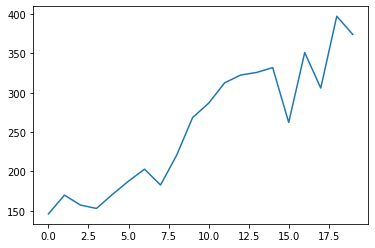

In [ ]:
#cum_time=[]

cum_time=[sum(lst)for lst in every_action_time]
plt.plot(cum_time)

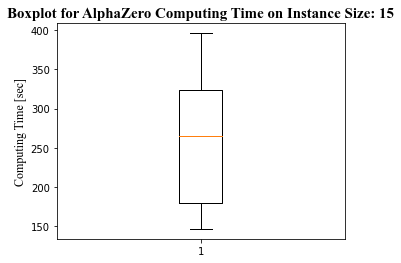

In [ ]:
fig = plt.figure(figsize =(4, 3))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(cum_time)
#plt.xlabel('Size: '+str(size_i), fontdict=font)
plt.ylabel('Computing Time [sec]', fontdict=font)

# show plot
plt.title(f"Boxplot for AlphaZero Computing Time on Instance Size: {15}", fontdict=font_2)

fig.savefig("outAZ"+str(15)+".svg", bbox_inches="tight", pad_inches=0)
#fig.savefig("test.svg", format="svg")
plt.show()

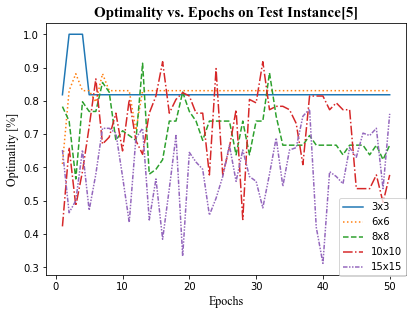

In [ ]:
# plot for training on one environment; training was only on _inst_4, and should be evaluated on 5 and 6
font = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        } 

font_2 = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'bold',
        'size': 15,
        } 
linestyle_tuple = [
        ('solid','solid'),
        ('dotted','dotted'),
        ('dashed','dashed'),
        ('dashdot','dashdot'),
        ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1))),
        ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),

     ('loosely dotted',        (0, (1, 10))),
     #('dotted',                (0, (1, 1))),
     #('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     #('loosely dashed',        (0, (5, 10))),
     #('dashed',                (0, (5, 5))),
     #('densely dashed',        (0, (5, 1))),

     #('loosely dashdotted',    (0, (3, 10, 1, 10))),
     #('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ub=50
eval_inst=[3,6,8,10,15]
gray_tone=(1/5)
def csv_to_data(path):
        df=pd.read_csv(path,index_col='Unnamed: 0')
        return df
        #return df[0][1:]
one_env=['/Users/felix/sciebo/masterarbeit/progra/model-based_rl/results/eval_3_inst_50_check.csv','/Users/felix/sciebo/masterarbeit/progra/model-based_rl/results/eval_6_inst_50_check.csv','/Users/felix/sciebo/masterarbeit/progra/model-based_rl/results/eval_8_inst_50_check.csv','/Users/felix/sciebo/masterarbeit/progra/model-based_rl/results/eval_10_inst_50_check.csv','/Users/felix/sciebo/masterarbeit/progra/model-based_rl/results/eval_15_inst_60_check_v2.csv']
nr_instance="5"
instances=[str(i)+'x'+str(i)+'_'+nr_instance+'_inst' for i in eval_inst]
fig = plt.figure(figsize =(5, 3.5))
ax = fig.add_axes([0, 0, 1, 1])


y_all=[]
for data,inst in zip(one_env,instances):
        df=csv_to_data(data)
        y=((df[inst]['train_reward']))
        ls = y.strip('[]').replace('"', '').replace(' ', '').split(',')
        y_all.append(ls[:ub])
        
x=[i for i in range(1,ub+1)] 
i=0  
for entry,inst in zip(y_all,instances):
        #fig = plt.figure(figsize =(4, 3))
        entry=[round(float(t),4) for t in entry]
        plt.plot(x,entry,label=inst[:-7],linestyle=linestyle_tuple[i][1])
        # grey scaled:
        #plt.plot(x,entry,label=inst[:-7],linestyle=linestyle_tuple[i][1],color=(gray_tone*i,gray_tone*i,i*gray_tone))

        i+=1
ax.set_xlabel('Epochs', fontdict=font)
ax.set_ylabel('Optimality [%]', fontdict=font)
fig.legend(bbox_to_anchor=(1.015, -0.025), loc=4, ncol=1)
plt.title(f"Optimality vs. Epochs on Test Instance["+nr_instance+"]", fontdict=font_2)

fig.show
fig.savefig("training_one_environment_eval_test_"+nr_instance+"v2.svg", bbox_inches="tight", pad_inches=0)


0.7598441558441559
0.8096792717086835
0.7426653290529696
0.6810444606413995
0.6925859153354856


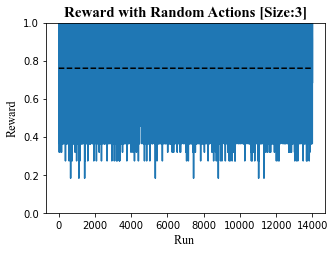

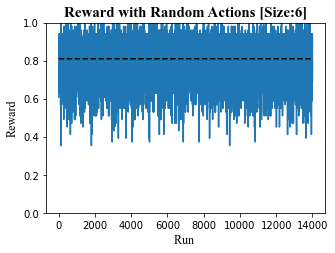

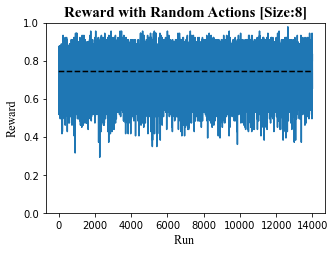

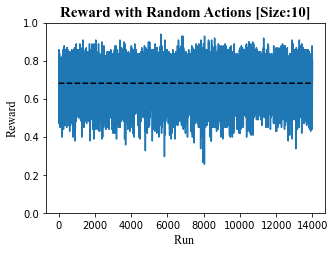

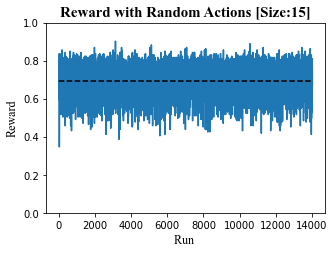

In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as s
eval_size=[3,6,8,10,15]
for e_size in eval_size:
    fig = plt.figure(figsize =(5, 3.5))
    pre='/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/jsons/'
    filename=pre+'random_reward_14000sims_inst'+str(e_size)+'_4.json'
    with open(filename, 'r') as f:
        train_rewards = json.load(f)
    x=[i for i in range(0,len(train_rewards))]
    plt.plot(x,train_rewards)
    plt.xlabel('Run ', fontdict=font)
    plt.ylabel('Reward', fontdict=font)
    
    mean_v=s.mean(train_rewards)
    print(mean_v)
    y=[mean_v for i in range(0,len(train_rewards))]
    plt.plot(x,y,'--k')
    # show plot
    plt.title(f"Reward with Random Actions [Size:{e_size}]", fontdict=font_2)
    plt.ylim([0,1])

    fig.savefig("random_rewards_out"+str(e_size)+"v2.svg", bbox_inches="tight", pad_inches=0)


0.713562091503268
0.758578431372549


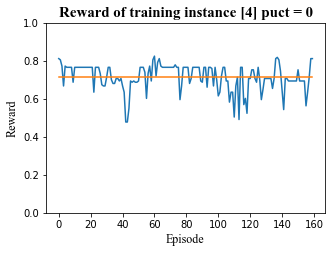

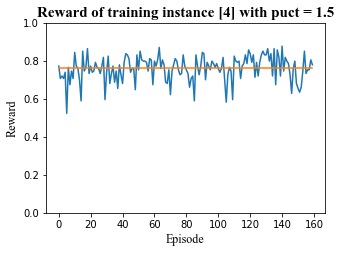

In [ ]:
import ast
import statistics as s



#df=csv_to_data('eval_15_inst_258_check_only2sims.csv')
#print(df.keys())

df2=csv_to_data('different_numsims_eval_15_inst4_258_check_only2sims_0puct.csv')
reward_list_2=ast.literal_eval(df2.iloc[1][1])
#df2=csv_to_data('different_num_sims_az_1_5_puct_inst4.csv')
#print(df2.keys())
fig = plt.figure(figsize =(5, 3.5))
plt.xlabel('Episode', fontdict=font)
plt.ylabel('Reward', fontdict=font)
# show plot
plt.title(f"Reward of training instance [4] puct = 0", fontdict=font_2)
plt.ylim([0,1])
plt.plot(reward_list_2[:160])
mean_ar=[s.mean(reward_list_2[:160]) for _ in range(160)]
print(mean_ar[0])
plt.plot(mean_ar)

# second plot
df2=csv_to_data('different_numsims_eval_15_inst4_258_check_only2sims_1.5puct.csv')
reward_list_2=ast.literal_eval(df2.iloc[1][1])
#df2=csv_to_data('different_num_sims_az_1_5_puct_inst4.csv')
#print(df2.keys())
fig = plt.figure(figsize =(5, 3.5))
plt.xlabel('Episode', fontdict=font)
plt.ylabel('Reward', fontdict=font)
# show plot
plt.title(f"Reward of training instance [4] with puct = 1.5", fontdict=font_2)
plt.ylim([0,1])
plt.plot(reward_list_2[:160])

mean_ar=[s.mean(reward_list_2[:160]) for _ in range(160)]
print(mean_ar[0])
plt.plot(mean_ar)



In [ ]:
import pandas as pd
df=pd.read_csv('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/results/eval_15_multi_inst_10_check.csv')
df.columns = df.columns.str.replace('/home/fs608798/masterarbeit/model-based_rl/training_checkpoints/ima_15_15_ima_10inner/15x15_', '')

In [ ]:
# plot optimal solutions
import math
import plotly.express as px
import pandas as pd
from datetime import datetime, timedelta
def render(production_list,n_machines,x_bar="Machine",y_bar="Job",start_count=0,keep_grey=False):
    # is not time critical function. so O(n^2) is no problem; todo:make more pretty
    def production_to_dict(input,i,j):
        return(dict(Job=f"job_{str(input[0]+start_count).zfill(max_len)}", Start=dt + timedelta(seconds=int(input[2]+start_count)),Finish=dt + timedelta(seconds=int(input[3])),Machine=f"machine_{str(i+start_count).zfill(max_len)}"))
    dt = datetime(2022, 1, 1, 0, 0, 0)
    #stores quatuple(job,task,start_time,finish_time) 
    liste=[]
    max_len=len(str(max(production_list.shape[0]-1+start_count,production_list.shape[1]-1+start_count)))
    for i in range(production_list.shape[0]):
        for j in range(production_list.shape[1]):
            if production_list[i,j] is not None:
                liste.append(production_to_dict(production_list[i,j],i,j))
    df_render=pd.DataFrame(liste)
    if df_render.empty:
        # do not rise an error; production plan is empty and could be filled
        print("Production plan is empty; nothing to plot")
    else:
        df_render.sort_values(by=y_bar,inplace=True)
        #fig = px.timeline(df_render, x_start="Start", x_end="Finish", y="Task", color="Resource")
        #colour in grey:
        if keep_grey:
            max_len=len(str(n_machines))
            rgb_add=math.floor( 255/int(n_machines))
            color_map={}

            for i in range(n_machines):
                color_map['machine_'+str(i).zfill(max_len)]=f"rgb({i*rgb_add},{i*rgb_add},{i*rgb_add})"
                
            fig = px.timeline(df_render, x_start="Start", x_end="Finish", color=x_bar, y=y_bar,color_discrete_map=color_map)
        else:
            fig = px.timeline(df_render, x_start="Start", x_end="Finish", color=x_bar, y=y_bar)

        #todo, save or do smth else to console rendering
        fig.show()
def json_to_prod(path=None):
    with open(path) as f:
        instance_dict = json.load(f)
    production_list=np.empty((int(instance_dict['n_resources']),int(instance_dict['n_jobs']*int(instance_dict['n_jobs'])/int(instance_dict['n_resources']))),dtype=object)
    def find_task(job,mach):
        return instance_dict['jssp_instance']['machines'][int(job)].index(int(mach))
    production_list_counter=np.zeros(int(instance_dict['n_resources']))    
    for i in range(instance_dict['n_jobs']*instance_dict['n_ops_per_job']):
        tup=(instance_dict['optimal_gantt_data'][str(i)]['Job_num'],find_task(instance_dict['optimal_gantt_data'][str(i)]['Job_num'],instance_dict['optimal_gantt_data'][str(i)]['Mach_num']),instance_dict['optimal_gantt_data'][str(i)]['Start_time'],int(instance_dict['optimal_gantt_data'][str(i)]['Start_time'])+int(instance_dict['optimal_gantt_data'][str(i)]['Job_time']))
        
        production_list[int(instance_dict['optimal_gantt_data'][str(i)]['Mach_num']),int(production_list_counter[int(instance_dict['optimal_gantt_data'][str(i)]['Mach_num'])])]=tup
        production_list_counter[int(instance_dict['optimal_gantt_data'][str(i)]['Mach_num'])]+=1
    return production_list


p_1=json_to_prod(path='/Users/felix/sciebo/masterarbeit/progra/model-based_rl/resources/jsp_instances/ima/15x15x15/15x15_4_inst.json')
render(p_1,len(p_1))
    

0.9024979854955681
0.6826097051311817
0.9102874026322858
0.8195960065010448
0.9077356970185335
0.8349198978407244
0.8312545098443459
0.6281079643664406
0.838779507267292
0.6674644329211541
0.8406349860839089
0.6584230820369632
0.746343537414966
0.6292955326460481
0.7558673469387756
0.6531786941580756
0.7634353741496599
0.6390893470790378
0.7170915032679739
0.5602898550724638
0.745718954248366
0.6307971014492754
0.7474509803921568
0.6357971014492754


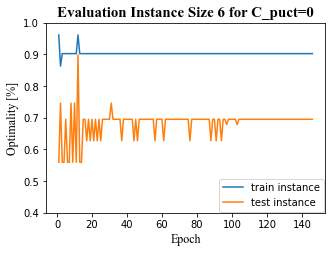

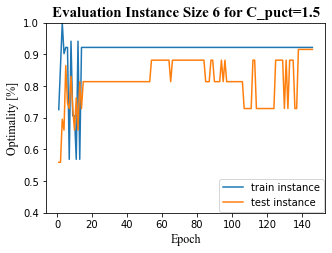

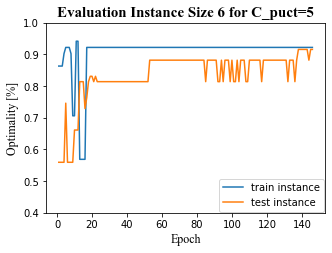

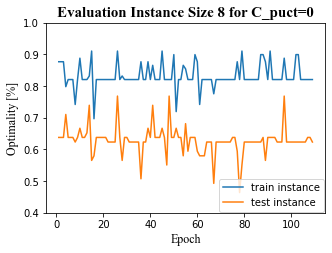

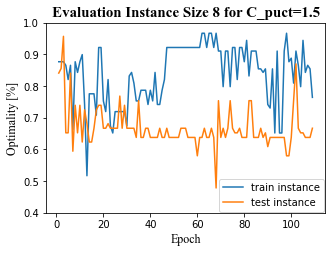

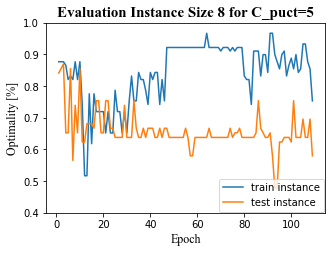

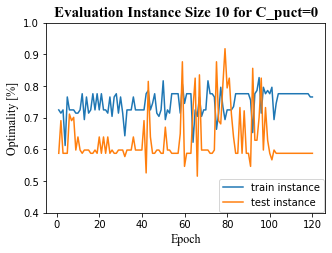

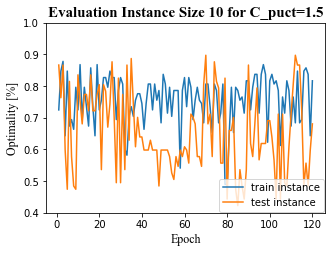

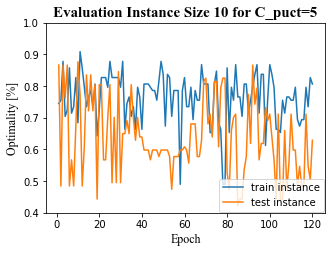

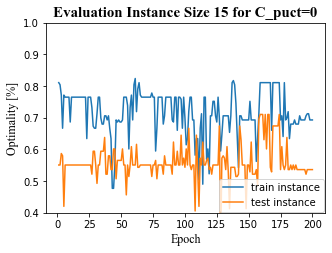

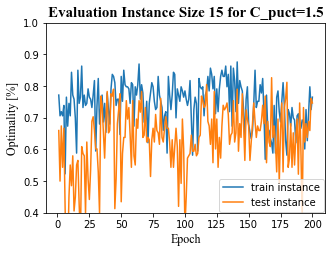

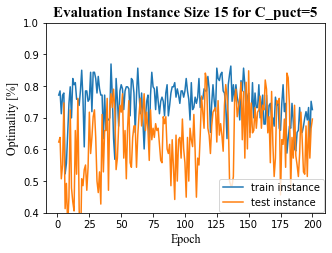

In [ ]:
import statistics as s
save_folder='/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/figures/compare_puctv2/'
puct=[0,1.5,5]
nr_checkpoints=[146,109,120,200]
inst=[6,8,10,15]
for j,inst_nr in enumerate(inst):
    check=str(nr_checkpoints[j])
    inst_nr=str(inst_nr)
    df_0=csv_to_data('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/compare_puct/eval_size'+inst_nr+'_inst_4and5_'+check+'_2sims_0puct.csv')
    df_1=csv_to_data('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/compare_puct/eval_size'+inst_nr+'_inst_4and5_'+check+'_2sims_1.5puct.csv')
    df_5=csv_to_data('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/compare_puct/eval_size'+inst_nr+'_inst_4and5_'+check+'_2sims_5puct.csv')
    x=[i for i in range(1,int(check)+1)]

    y_0=[float(df_0[''+inst_nr+'x'+inst_nr+'_4_inst'][1])]
    y_1=[float(df_1[''+inst_nr+'x'+inst_nr+'_4_inst'][1])]
    y_5=[float(df_5[''+inst_nr+'x'+inst_nr+'_4_inst'][1])]

    y_0_5=[float(df_0[''+inst_nr+'x'+inst_nr+'_5_inst'][1])]
    y_1_5=[float(df_1[''+inst_nr+'x'+inst_nr+'_5_inst'][1])]
    y_5_5=[float(df_5[''+inst_nr+'x'+inst_nr+'_5_inst'][1])]

    for i in range(1,int(check)):
        y_0.append(float(df_0[''+inst_nr+'x'+inst_nr+'_4_inst.'+str(i)][1]))
        y_1.append(float(df_1[''+inst_nr+'x'+inst_nr+'_4_inst.'+str(i)][1]))
        y_5.append(float(df_5[''+inst_nr+'x'+inst_nr+'_4_inst.'+str(i)][1]))
        y_0_5.append(float(df_0[''+inst_nr+'x'+inst_nr+'_5_inst.'+str(i)][1]))
        y_1_5.append(float(df_1[''+inst_nr+'x'+inst_nr+'_5_inst.'+str(i)][1]))
        y_5_5.append(float(df_5[''+inst_nr+'x'+inst_nr+'_5_inst.'+str(i)][1]))


    #y=df.iloc[1]
    fig, ax = plt.subplots(figsize=(5,3.5))
    plt.xlabel('Epoch', fontdict=font)
    plt.ylabel('Optimality [%]', fontdict=font)
    plt.title('Evaluation Instance Size '+inst_nr+ ' for C_puct=0', fontdict=font_2)
    plt.ylim([0.4,1])

    print(s.mean(y_0))
    print(s.mean(y_0_5))

    plt.plot(x,y_0,label='train instance')
    plt.plot(x,y_0_5,label='test instance')
    fig.legend(bbox_to_anchor=(0.91, 0.11), loc=4)
    fig.savefig(save_folder+"puct0_size_"+inst_nr+"v2.svg", bbox_inches="tight", pad_inches=0)

    fig, ax = plt.subplots(figsize=(5,3.5))
    plt.xlabel('Epoch', fontdict=font)
    plt.ylabel('Optimality [%]', fontdict=font)
    plt.title('Evaluation Instance Size '+inst_nr+ ' for C_puct=1.5', fontdict=font_2)
    plt.ylim([0.4,1])
    print(s.mean(y_1))
    print(s.mean(y_1_5))

    plt.plot(x,y_1,label='train instance')
    plt.plot(x,y_1_5,label='test instance')
    fig.legend(bbox_to_anchor=(0.91, 0.11), loc=4)
    fig.savefig(save_folder+"puct1_5_size_"+inst_nr+"v2.svg", bbox_inches="tight", pad_inches=0)

    fig, ax = plt.subplots(figsize=(5,3.5))
    plt.xlabel('Epoch', fontdict=font)
    plt.ylabel('Optimality [%]', fontdict=font)
    plt.title('Evaluation Instance Size '+inst_nr+ ' for C_puct=5', fontdict=font_2)
    plt.ylim([0.4,1])
    print(s.mean(y_5))
    print(s.mean(y_5_5))

    plt.plot(x,y_5,label='train instance')
    plt.plot(x,y_5_5,label='test instance')
    fig.legend(bbox_to_anchor=(0.91, 0.11), loc=4)
    fig.savefig(save_folder+"puct5_size_"+inst_nr+"v2.svg", bbox_inches="tight", pad_inches=0)


# z = np.polyfit(x, y, 2)
# p = np.poly1d(z)
# plt.xlabel('Instance Size', fontdict=font)
# plt.ylabel('Computing Time [sec]', fontdict=font)
# for index in range(len(x)):
#     ax.text(x[index], y[index], y[index], size=8)  
# plt.title('AlphaZero Computing Time with 100 parallel simulations', fontdict=font_2)
# plt.plot(x,p(x))
# plt.xlim([0,15])
# fig.savefig("different_instances_AlphaZero"+".svg", bbox_inches="tight", pad_inches=0)

/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/multi_env/eval_multi_size3_500sims_v2.csv
/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/multi_env/eval_multi_size6_500sims_v2.csv
/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/multi_env/eval_merged_multi_size8_500sims_v2.csv
/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/multi_env/eval_merged_multi_size10_500sims_v2.csv
/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/multi_env/eval_merged_multi_size15_500sims_v2.csv


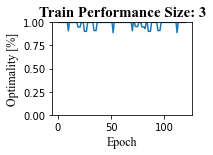

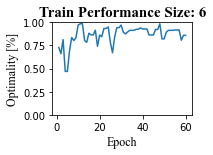

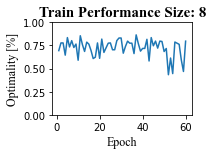

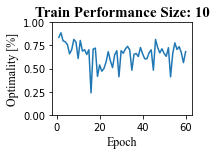

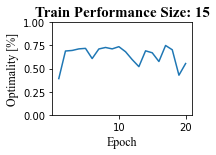

In [ ]:
data=['/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/multi_env/eval_multi_size3_500sims_v2.csv','/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/multi_env/eval_multi_size6_500sims_v2.csv','/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/multi_env/eval_merged_multi_size8_500sims_v2.csv','/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/multi_env/eval_merged_multi_size10_500sims_v2.csv','/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/multi_env/eval_merged_multi_size15_500sims_v2.csv']
sizes=[3,6,8,10,15]
save_folder='/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/figures/multi_instances/'
for i,l_d in enumerate(data):
    print(l_d)
    fig, ax = plt.subplots(figsize=(2.5,1.7))
    plt.xlabel('Epoch', fontdict=font)
    plt.ylabel('Optimality [%]', fontdict=font)
    plt.title(f"Train Performance Size: {str(sizes[i])}", fontdict=font_2)
    plt.ylim([0,1.00])

    df=csv_to_data(l_d)
    size_n=df.shape[1]
    y=[float(df[str(i)][1]) for i in range(1,size_n)]
    x=[i for i in range(1,size_n)]

    # for x_i in x:
    #     if x_i % 3 == 0:
            #ax.axvline(x_i, color='r',lin)
       
    plt.plot(x,y)
    #fig.legend(loc=5)
    fig.savefig(save_folder+"small_multi_instance_train_eval_s_"+str(sizes[i])+"v2.svg", bbox_inches="tight", pad_inches=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


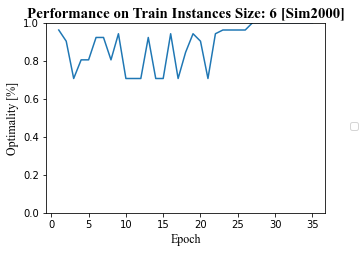

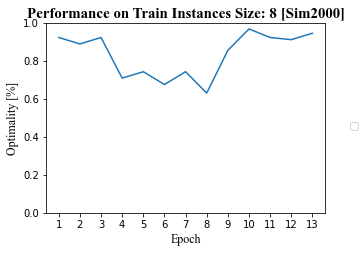

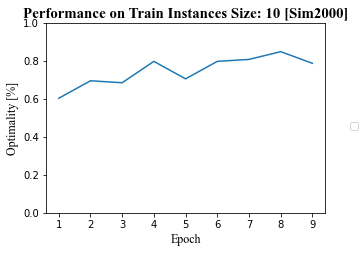

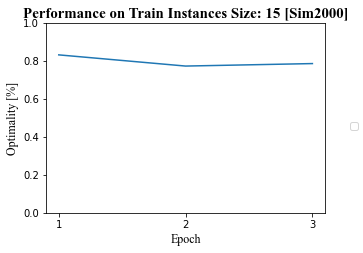

In [ ]:
sizes=[6,8,10,15]
checkpoints=[35,13,9,3]
save_folder='/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/figures/one_environment_2000/'
for size_i,c in zip(sizes,checkpoints):
    df=csv_to_data('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/2000sims/eval_size'+str(size_i)+'_inst_4and5_'+str(c)+'_2sims_1_5puct_2000sims.csv')
    fig, ax = plt.subplots(figsize=(5,3.5))
    plt.xlabel('Epoch', fontdict=font)
    plt.ylabel('Optimality [%]', fontdict=font)
    plt.title(f"Performance on Train Instances Size: {str(size_i)} [Sim2000]", fontdict=font_2)
    plt.ylim([0,1.00])
    #ax.locator_params(integer=True)
    size_n=df.shape[1]
    size_n=c
    pre_col=f"{size_i}x{size_i}_4_inst"
    y=[]
    y.append(float(df[pre_col][1]))
    for i in range(1,size_n):
        y.append(float(df[pre_col+"."+str(i)][1]))
    x=[i for i in range(1,size_n+1)]
    if c!=35:
        plt.xticks(range(min(x), max(x)+1))

    plt.plot(x,y)
    fig.legend(loc=5)
    fig.savefig(save_folder+"train_eval_s_"+str(size_i)+"sim2000.svg", bbox_inches="tight", pad_inches=0)

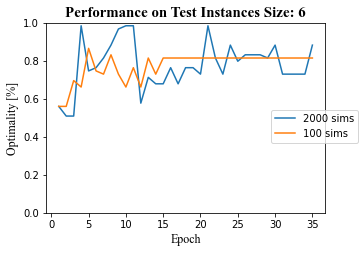

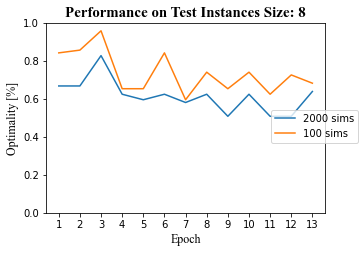

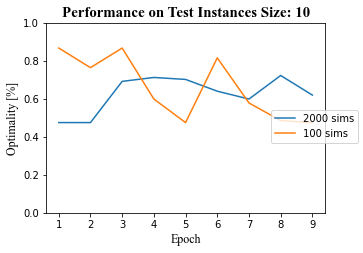

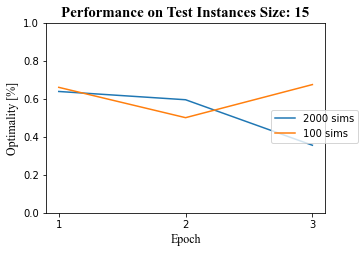

In [ ]:
sizes=[6,8,10,15]
checkpoints=[35,13,9,3]
checkpoints_2=[146,109,120,200]
save_folder='/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/figures/one_environment_2000/'
for size_i,c in zip(sizes,checkpoints):
    df=csv_to_data('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/2000sims/eval_size'+str(size_i)+'_inst_4and5_'+str(c)+'_2sims_1_5puct_2000sims.csv')
    df2=csv_to_data('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/compare_puct/eval_size'+str(size_i)+'_inst_4and5_'+str(checkpoints_2.pop(0))+'_2sims_1.5puct.csv')
    fig, ax = plt.subplots(figsize=(5,3.5))
    plt.xlabel('Epoch', fontdict=font)
    plt.ylabel('Optimality [%]', fontdict=font)
    plt.title(f"Performance on Test Instances Size: {str(size_i)}", fontdict=font_2)
    plt.ylim([0,1.00])
    #ax.locator_params(integer=True)
    size_n=df.shape[1]
    size_n=c
    pre_col=f"{size_i}x{size_i}_5_inst"
    y=[]
    y.append(float(df[pre_col][1]))
    for i in range(1,size_n):
        y.append(float(df[pre_col+"."+str(i)][1]))
    y_2=[]
    y_2.append(float(df2[pre_col][1]))
    for i in range(1,size_n):
        y_2.append(float(df2[pre_col+"."+str(i)][1]))    
    
    x=[i for i in range(1,size_n+1)]
    if c!=35:
        plt.xticks(range(min(x), max(x)+1))

    plt.plot(x,y,label='2000 sims')
    plt.plot(x,y_2,label='100 sims')
    fig.legend(loc=5)
    fig.savefig(save_folder+"compare_test_100sim_vs2000_s_"+str(size_i)+".svg", bbox_inches="tight", pad_inches=0)

0.8387826671548577
0.7955069891989311
0.8161010023556281
0.83897030908944
0.6414650961944793
0.7513890254115315
0.764536520198954
0.8532156571673156
0.6354633554269613
0.7277110331719676
0.7050956838877618
0.7749931315945872
0.6654416251375529
0.6487071972661221
0.7082496011281376
0.7471199810075129


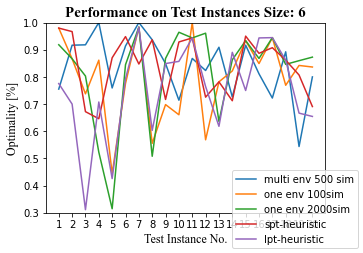

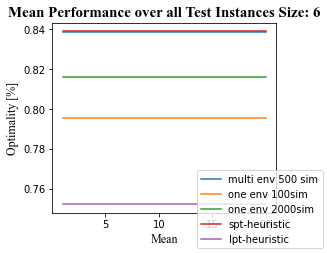

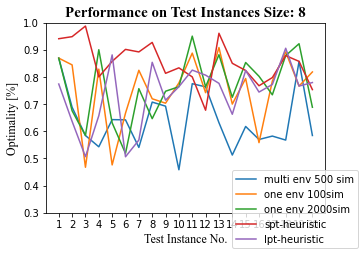

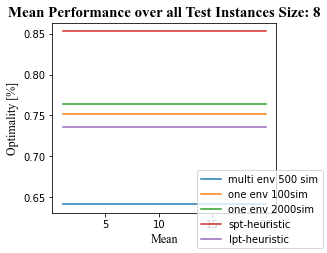

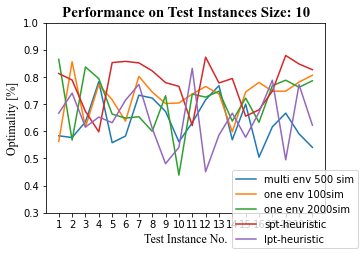

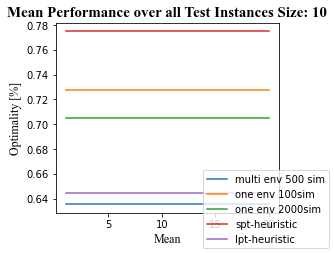

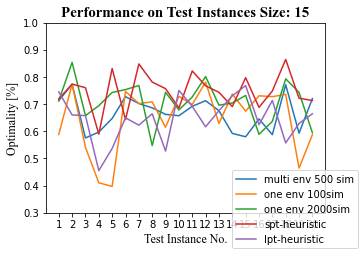

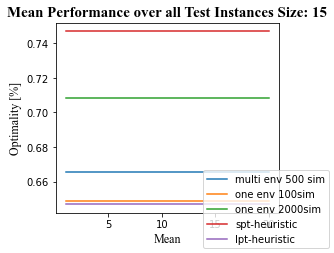

In [ ]:
import json
import statistics as s
sizes=[6,8,10,15]
save_folder='/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/figures/multiple_tests/'
checkpoints_id=['multi env 500 sim','one env 100sim','one env 2000sim','spt-heuristic','lpt-heuristic']
suffix=['','.1','.2']
for size_i in sizes:
    df=csv_to_data('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/multiple_tests/multiple_tests_size'+str(size_i)+'_inst_20_30_2sims_1_5puct.csv')
    fig, ax = plt.subplots(figsize=(5,3.5))
    plt.xlabel('Test Instance No.', fontdict=font)
    plt.ylabel('Optimality [%]', fontdict=font)
    plt.title(f"Performance on Test Instances Size: {str(size_i)}", fontdict=font_2)
    plt.ylim([0.3,1.00])
    #ax.locator_params(integer=True)
    y_1=[]
    y_2=[]
    y_3=[]
    y_4=[]
    y_5=[]
    curr_dir='/Users/felix/sciebo/masterarbeit/progra/model-based_rl'
    
    for inst in range(20,40):
        pre_col=f"{size_i}x{size_i}_{inst}_inst"
        json_path=curr_dir+'/resources/jsp_instances/ima/'+str(size_i)+'x'+str(size_i)+'x'+str(size_i)+'/'+str(size_i)+'x'+str(size_i)+'_'+str(inst)+'_inst.json'
        with open(json_path) as f:
            instance_dict = json.load(f)
        y_4.append(float(1-(instance_dict['spt_time']-instance_dict['optimal_time'])/instance_dict['optimal_time']))
        y_5.append(float(1-(instance_dict['lpt_time']-instance_dict['optimal_time'])/instance_dict['optimal_time']))
        y_1.append(float(df[pre_col+suffix[0]][1]))
        y_2.append(float(df[pre_col+suffix[1]][1]))
        y_3.append(float(df[pre_col+suffix[2]][1]))
    x=[i for i in range(1,21)]
    if c!=35:
        plt.xticks(range(min(x), max(x)+1))
    plt.plot(x,y_1,label=checkpoints_id[0])
    plt.plot(x,y_2,label=checkpoints_id[1])
    plt.plot(x,y_3,label=checkpoints_id[2])
    plt.plot(x,y_4,label=checkpoints_id[3])
    plt.plot(x,y_5,label=checkpoints_id[4])
    #plt.plot(x,y,label='2000 sims')
    #plt.plot(x,y_2,label='100 sims')
    fig.legend(loc=4)
    fig.savefig(save_folder+"test_instances_compare_multiple_s_"+str(size_i)+".svg", bbox_inches="tight", pad_inches=0)
    fig, ax = plt.subplots(figsize=(4,3.5))
    print(s.mean(y_1))
    print(s.mean(y_2))
    print(s.mean(y_3))
    print(s.mean(y_4))

    y_1=[s.mean(y_1) for i in range(1,21)]
    y_2=[s.mean(y_2) for i in range(1,21)]
    y_3=[s.mean(y_3) for i in range(1,21)]
    y_4=[s.mean(y_4) for i in range(1,21)]
    y_5=[s.mean(y_5) for i in range(1,21)]

    plt.plot(x,y_1,label=checkpoints_id[0])
    plt.plot(x,y_2,label=checkpoints_id[1])
    plt.plot(x,y_3,label=checkpoints_id[2])
    plt.plot(x,y_4,label=checkpoints_id[3])
    plt.plot(x,y_5,label=checkpoints_id[4])

    plt.xlabel('Mean', fontdict=font)
    plt.ylabel('Optimality [%]', fontdict=font)
    plt.title(f"Mean Performance over all Test Instances Size: {str(size_i)}", fontdict=font_2)
    #plt.ylim([0.5,0.9])
    fig.legend(loc=4)
    fig.savefig(save_folder+"test_instances_compare_multiple_mean_s_"+str(size_i)+".svg", bbox_inches="tight", pad_inches=0)


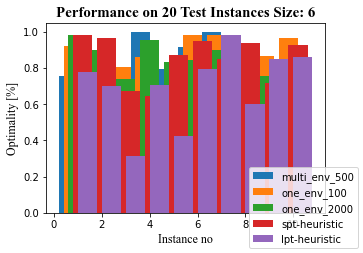

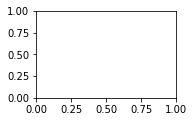

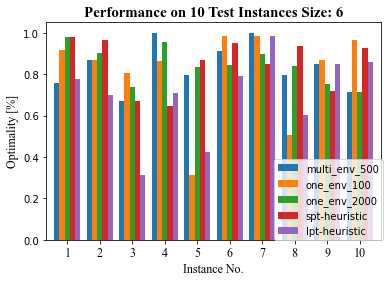

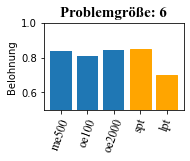

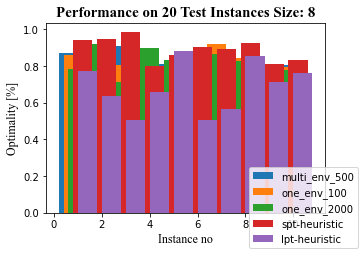

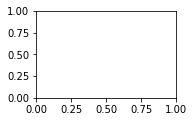

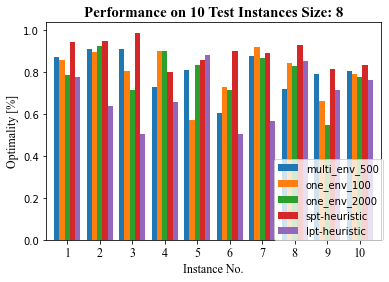

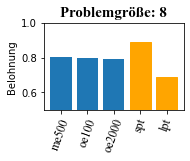

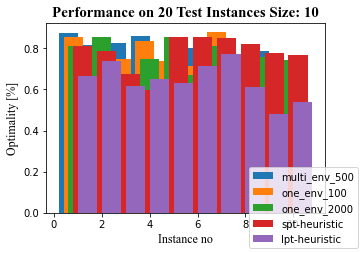

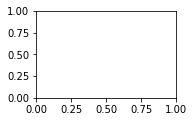

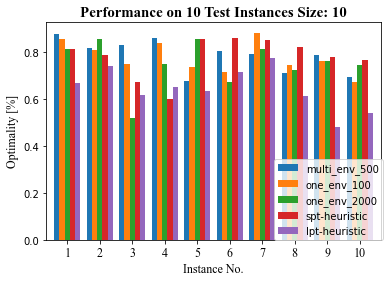

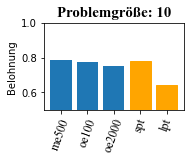

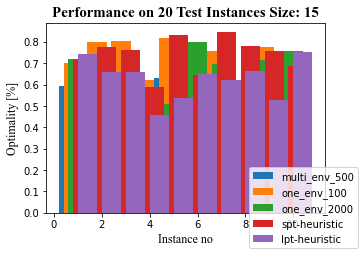

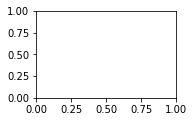

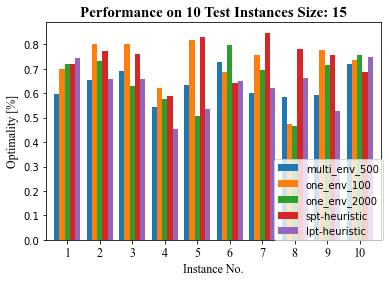

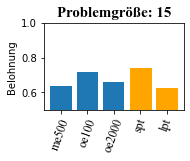

In [9]:
import json
import statistics as s
num_inst=str(6)
legend_id=['multi_env_500', 'one_env_100', 'one_env_2000', 'spt-heuristic', 'lpt-heuristic']
x_label=['me500','oe100','oe2000','spt','lpt']
best_check_over_all=[]
num_eval_inst=10
for num_inst in ['6','8','10','15']:
    df=pd.read_csv('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/all_checkpoints/all_checkpoints_tests_size'+num_inst+'_inst_20_40_2sims_1_5puct.csv')
    checkpoints_id=['500_sims_multi_env','one_env_100','one_env_2000']
    heuristic_id=['spt-heuristic','lpt-heuristic']
    c_2000={'6':35,'8':13,'10':9,'15':3}
    c_one={'6':146,'8':109,'10':120,'15':64}
    c_multi={'6':60,'8':60,'10':60,'15':60}
    c_all={'one_env_2000':c_2000,'one_env_100':c_one,'500_sims_multi_env':c_multi}

    cuml_reward={}


    for id in checkpoints_id:
        cuml_reward[id]={}

    for id in checkpoints_id:

        for c_nr in range(1,c_all[id][num_inst]):
            for inst in range(20,20+num_eval_inst):
                identifier=f"{num_inst}x{num_inst}_{str(inst)}_inst_{id}_{c_nr}"
                if str(c_nr) in cuml_reward[id]:
                    cuml_reward[id][str(c_nr)]+= float(df[identifier][0])
                else:
                    cuml_reward[id][str(c_nr)]= float(df[identifier][0])
    #print(cuml_reward)
    best_check=[]
    for id in checkpoints_id:
        
        maximum = max(cuml_reward[id], key=cuml_reward[id].get)  # Just use 'min' instead of 'max' for minimum.
        #print(maximum, cuml_reward[id][maximum])
        best_check.append(maximum)
    best_check_over_all.append(best_check) 
    y=[]
    y.append([])
    y.append([])
    y.append([])
    y.append([])
    y.append([])
    inn=0
    fig, ax = plt.subplots(figsize=(5,3.5))
    for id,best in zip(checkpoints_id,best_check):
        for inst in range(20,20+num_eval_inst):
            identifier=f"{num_inst}x{num_inst}_{str(inst)}_inst_{id}_{best}"
            y[inn].append(float(df[identifier][0]))
        inn+=1
    size_i=num_inst
    # append with heuristics:
    for inst in range(20,20+num_eval_inst):
        json_path=curr_dir+'/resources/jsp_instances/ima/'+str(size_i)+'x'+str(size_i)+'x'+str(size_i)+'/'+str(size_i)+'x'+str(size_i)+'_'+str(inst)+'_inst.json'
        with open(json_path) as f:
            instance_dict = json.load(f)
        y[3].append(float(1-(instance_dict['spt_time']-instance_dict['optimal_time'])/instance_dict['optimal_time']))
        y[4].append(float(1-(instance_dict['lpt_time']-instance_dict['optimal_time'])/instance_dict['optimal_time']))
    x=[i for i in range(1,num_eval_inst+1)]
    all_id=checkpoints_id+heuristic_id
    offset=[-0.4,-0.2,0,0.2,0.4]
    for i in range(5):
        x_2=[x+offset[i] for x in x]
        plt.bar(x_2,y[i],label=legend_id[i])
    #plot heuristics:

    fig.legend(loc=4)
    plt.xlabel('Instance no', fontdict=font)
    plt.ylabel('Optimality [%]', fontdict=font)
    plt.title(f"Performance on 20 Test Instances Size: {str(num_inst)}", fontdict=font_2)
    fig, ax = plt.subplots(figsize=(2.5,1.6))

    df2=pd.DataFrame([[str(i+1),y[0][i],y[1][i],y[2][i],y[3][i],y[4][i]] for i in range(0,num_eval_inst)],columns=['id']+[legend_id[i] for i in range(0,5)]) 
  
    df2.plot(
            x='id' ,
            kind='bar', 
            stacked=False, 
            title='Grouped Bar Graph with dataframe',width=0.8) 
    plt.legend(loc=4,bbox_to_anchor=(1.02,-0.024))
    plt.xlabel('Instance No.', fontdict=font)
    plt.ylabel('Optimality [%]', fontdict=font)
    plt.title(f"Performance on {str(num_eval_inst)} Test Instances Size: {str(num_inst)}", fontdict=font_2)
    #plt.show()
    plt.xticks(rotation=0, fontname='Times New Roman', fontsize=12)

    save_folder='/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/figures/bar_charts/'
    #plt.savefig(save_folder+"test_instances_bar_chart_s_"+str(num_inst)+".svg", bbox_inches="tight", pad_inches=0)

    y_mean=[]
    for i in range(5):
        y_mean.append(s.mean(y[i]))
    fig, ax = plt.subplots(figsize=(2.5,1.6))
    x=[i for i in range(1,6)]
    bars=plt.bar(x_label,y_mean)
    #plt.legend(legend_id)
    #bars = plt.gca().get_children()

    # Change the color of the last two bars
    for bar in bars[-2:]:
        bar.set_color('orange')

    plt.xticks(rotation=70, fontname='Times New Roman', fontsize=12)
    plt.title(f"Problemgröße: {str(num_inst)}", fontdict=font_2)
    plt.ylim([0.5,1.00])
    plt.ylabel("Belohnung")
    #plt.xlabel(x_label)
    # Get the bar objects

    
    plt.savefig("mean_optimality_bar_chart_small__presentation"+str(num_inst)+"v2.svg", bbox_inches="tight", pad_inches=0)
    plt.show()




In [382]:
df=pd.read_csv('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/general_and_scale/gen_scale_tests_size6_inst_20_50_2sims_1_5puct.csv')
print(df.keys())

Index(['Unnamed: 0', '6x6_20_inst_500_sims_multi_env_s6',
       '6x6_20_inst_one_env_100_s6', '6x6_20_inst_one_env_2000_s6',
       '6x6_20_inst_500_sims_multi_env_s8', '6x6_20_inst_one_env_100_s8',
       '6x6_20_inst_one_env_2000_s8', '6x6_20_inst_500_sims_multi_env_s10',
       '6x6_20_inst_one_env_100_s10', '6x6_20_inst_one_env_2000_s10',
       ...
       '6x6_39_inst_one_env_2000_s6', '6x6_39_inst_500_sims_multi_env_s8',
       '6x6_39_inst_one_env_100_s8', '6x6_39_inst_one_env_2000_s8',
       '6x6_39_inst_500_sims_multi_env_s10', '6x6_39_inst_one_env_100_s10',
       '6x6_39_inst_one_env_2000_s10', '6x6_39_inst_500_sims_multi_env_s15',
       '6x6_39_inst_one_env_100_s15', '6x6_39_inst_one_env_2000_s15'],
      dtype='object', length=241)


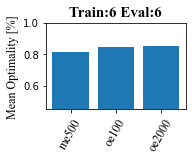

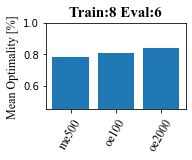

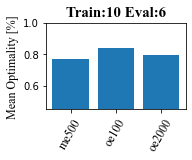

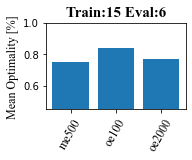

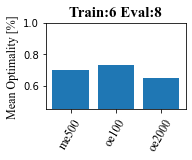

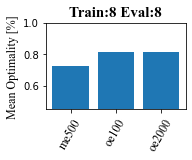

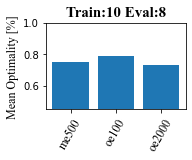

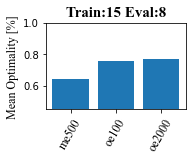

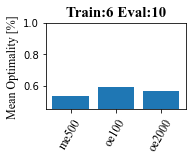

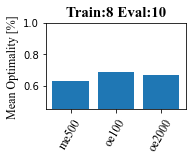

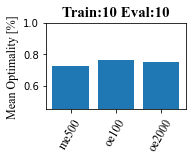

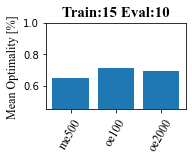

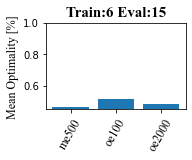

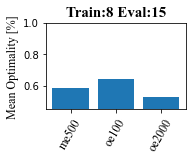

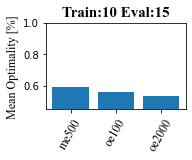

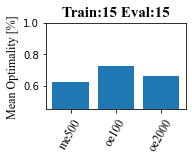

In [389]:
import statistics as s
#path='/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/general_and_scale/gen_scale_tests_size6_inst_20_50_2sims_1_5puct.csv'
save_folder='/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/figures/bar_charts_gen_scalv2/'
ids=['500_sims_multi_env','one_env_100','one_env_2000']
x_label=['me500','oe100','oe2000']
sizes=[6,8,10,15]
for eval_i in sizes:
    df=pd.read_csv('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/general_and_scale/gen_scale_tests_size'+str(eval_i)+'_inst_20_50_2sims_1_5puct.csv')
   
    for train_i in sizes:
        y=[]
        for id in ids:
            identifier=id+"_s"+str(train_i)
            data_new=df[df.columns[df.columns.str.contains(identifier)]]
            #print(data_new.keys())
            ep=((data_new.loc[0].squeeze()).astype(np.float64))
            ep=ep.to_list()
            #ep= s.mean(ep)
            y.append(s.mean(ep))
        fig, ax = plt.subplots(figsize=(2.5,1.6))
        plt.bar(x_label,y)
        plt.title(f"Train:{str(train_i)} Eval:{str(eval_i)}",fontdict=font_2)
        plt.ylabel("Mean Optimality [%]",fontdict=font)
        plt.ylim([0.45,1])
        plt.xticks(rotation=60, fontname='Times New Roman', fontsize=12)
        
        fig.savefig(save_folder+"barchart_small_test_instances_train_"+str(train_i)+"test_"+str(eval_i)+"v2.svg", bbox_inches="tight", pad_inches=0)




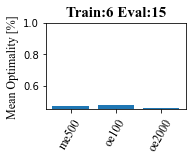

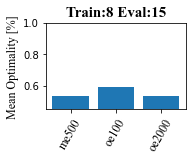

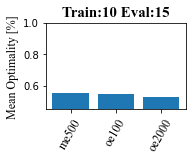

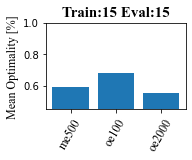

In [395]:
df=pd.read_csv('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/gen_scale_tests_size15_inst_20_50_100sims_1_5puct.csv')
#print(df.keys)
for train_i in sizes:
        y=[]
        for id in ids:
            identifier=id+"_s"+str(train_i)
            data_new=df[df.columns[df.columns.str.contains(identifier)]]
            #print(data_new.keys())
            ep=((data_new.loc[0].squeeze()).astype(np.float64))
            ep=ep.to_list()
            #ep= s.mean(ep)
            y.append(s.mean(ep))
        fig, ax = plt.subplots(figsize=(2.5,1.6))
        plt.bar(x_label,y)
        plt.title(f"Train:{str(train_i)} Eval:{str(eval_i)}",fontdict=font_2)
        plt.ylabel("Mean Optimality [%]",fontdict=font)
        plt.ylim([0.45,1])
        plt.xticks(rotation=60, fontname='Times New Roman', fontsize=12)

['500_sims_multi_env', 'one_env_100', 'one_env_2000', 'spt-heuristic', 'lpt-heuristic']


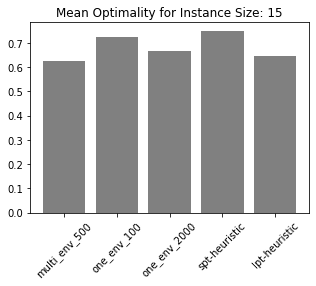

In [15]:
import statistics as s
y_mean=[]
for i in range(5):
    y_mean.append(s.mean(y[i]))
fig, ax = plt.subplots(figsize=(5,3.5))

plt.bar(legend_id,y_mean,color='grey')
plt.xticks(rotation=45)
plt.title(f"Mean Optimality for Instance Size: {str(num_inst)}")
print(all_id)


In [281]:
import os
from math import floor
from math import sqrt
# Here goes the ppo evaluation
ppo_dir='/Users/felix/sciebo/masterarbeit/ppo/train_punish'
all_dir=os.listdir(ppo_dir)
save_folder='/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/figures/ppo/training_fails/'
print(all_dir)
for nr_i,dir in enumerate(all_dir):
    pre=ppo_dir + "/"+ dir +"/progress.csv"
    if os.path.exists(pre):
        df=pd.read_csv(pre)

        # here goes the plot:
        y=df['episode_len_mean'].tolist()
        if len(y)> 10:
            size_i=floor(sqrt(y[-1]))

            print(size_i)
            if size_i > 15:
                size_i=15
            x=[i for i in range(len(y))]
            fig, ax = plt.subplots(figsize=(2.5,2.8))
            plt.plot(x,y)
            plt.xlabel('Epoch', fontdict=font)
            plt.ylabel('Mean Episode Length', fontdict=font)
            plt.title(f"Length vs. Epochs Size: {str(size_i)}", fontdict=font_2)
            fig.savefig(save_folder+"mean_episode_length_"+str(nr_i)+".svg", bbox_inches="tight", pad_inches=0)

            y=df['episode_reward_mean']
            x=[i for i in range(len(y))]
            fig, ax = plt.subplots(figsize=(2.5,2.8))
            plt.plot(x,y)
            plt.xlabel('Epoch', fontdict=font)
            plt.ylabel('Mean Episode Reward', fontdict=font)
            plt.title(f"Reward vs. Epochs Size: {str(size_i)}", fontdict=font_2)
            #plt.ylim([0.5,0.9])
            #fig.legend(loc=4)
            fig.savefig(save_folder+"mean_episode_reward_"+str(nr_i)+".svg", bbox_inches="tight", pad_inches=0)
            
       


FileNotFoundError: [Errno 2] No such file or directory: '/Users/felix/sciebo/masterarbeit/ppo/train_punish'

In [44]:
df=pd.read_csv('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/best_checkpoints_tests_size15_inst_20_220_2sims_1_5puct.csv')

print(df.shape)

(4, 301)


In [70]:
# investigate instance 5 and 8 for one env 100... on size 6
df=pd.read_csv('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/best_checkpoints_tests_size6_inst_20_220_2sims_1_5puct.csv')
identifier='6x6_24_inst_one_env_100_32'
print(df[identifier][0])
actions=df[identifier][2]

import numpy as np
#Users.felix.sciebo.masterarbeit.progra.model-based_rl.

from src.jss_lite.jss_lite import jss_lite
from wrapper.jssplight_wrapper import jssp_light_obs_wrapper_multi_instances
from wrapper.jssplight_wrapper import jssp_light_obs_wrapper_no_action_mask
import time
import os
from random import randrange
inst_num=str(24)
inst_s=str(6)

instance_load="/Users/felix/sciebo/masterarbeit/progra/model-based_rl/resources/jsp_instances/ima/"+inst_s+"x"+inst_s+"x"+inst_s+"/"+inst_s+"x"+inst_s+"_"+inst_num+"_inst.json"
env=jssp_light_obs_wrapper_multi_instances(instances_list=[instance_load],env_config="config")
state=env.get_state()
reward_list=[]
token=False
for a in actions:
    state, reward, done, info=env.step(a)  

print(done)
print(reward)

0.31481481481481477


In [112]:
import ast
import statistics as s
#df.columns[df.columns.str.contains('inst_one_env_100')]
data_new = pd.read_csv('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/all_checkpoints/all_checkpoints_tests_size6_inst_20_40_2sims_1_5puct.csv')
data_new=data_new[data_new.columns[data_new.columns.str.contains('inst_one_env_100_33')]]
ep=((data_new.loc[1].squeeze()))
ep=ep.to_list()
ep=[ sum( ast.literal_eval(ep[i])) for i in range(0,len(ep))]


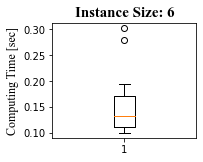

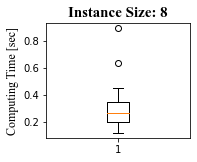

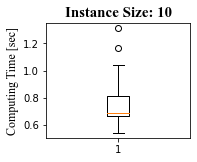

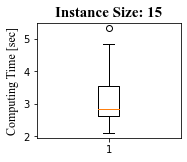

In [115]:
#boxplots for alphazero time
import pandas as pd
data_2 = pd.read_csv('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/all_checkpoints/all_checkpoints_tests_size6_inst_20_40_2sims_1_5puct.csv')
data_3 = pd.read_csv('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/all_checkpoints/all_checkpoints_tests_size8_inst_20_40_2sims_1_5puct.csv')
data_4 = pd.read_csv('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/all_checkpoints/all_checkpoints_tests_size10_inst_20_40_2sims_1_5puct.csv')
data_5 = pd.read_csv('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/all_checkpoints/all_checkpoints_tests_size15_inst_20_40_2sims_1_5puct.csv')
size=[6,8,10,15]

data = [ data_2, data_3, data_4, data_5]

for data_new,size_i in zip(data,size): 
        fig = plt.figure(figsize =(2, 1.6))
        data_new=data_new[data_new.columns[data_new.columns.str.contains('inst_one_env_100_33')]]
        ep=((data_new.loc[1].squeeze()))
        ep=ep.to_list()
        ep=[ sum( ast.literal_eval(ep[i])) for i in range(0,len(ep))]
        # Creating axes instance
        ax = fig.add_axes([0, 0, 1, 1])
        #data=[ sum( ast.literal_eval(datum[i])) for i in range(1,len(datum))]

        # Creating plot
        bp = ax.boxplot(ep)
        #plt.xlabel('Size: '+str(size_i), fontdict=font)
        plt.ylabel('Computing Time [sec]', fontdict=font)

        # show plot
        plt.title(f"Instance Size: {size_i}", fontdict=font_2)

        fig.savefig("box_plot_small_alpha_zero_out"+str(size_i)+".svg", bbox_inches="tight", pad_inches=0)
        #fig.savefig("test.svg", format="svg")
        plt.show()

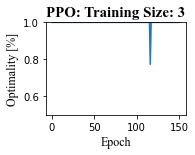

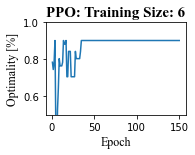

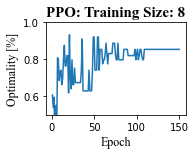

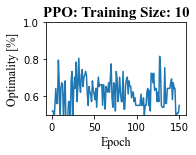

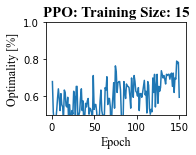

In [301]:
sizes=[3,6,8,10,15]
for s_i in sizes:
    df=pd.read_csv('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/csv/ppo/eval_ppo_punish_size'+str(s_i)+'_inst_4_v2.csv')
    y_train=(df.loc[1].squeeze())[1:].astype(np.float64).to_list()
    x=[i for i in range(1,len(y_train)+1)]
    fig, ax = plt.subplots(figsize=(2.5,1.7))
    plt.ylabel('Optimality [%]', fontdict=font)
    plt.xlabel('Epoch', fontdict=font)
    plt.ylim([0.5,1.00])

    # show plot
    plt.title(f"PPO: Training Size: {s_i}", fontdict=font_2)

    

    plt.plot(x,y_train)
    fig.savefig("ppo_train_s_"+str(s_i)+".svg", bbox_inches="tight", pad_inches=0)

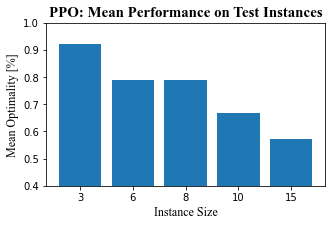

In [401]:
import statistics as s
sizes=[3,6,8,10,15]
bar_data=[]

for inst in sizes:
    df=pd.read_csv('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/eval_ppo_punish_size'+str(inst)+'_inst_20_40_v3.csv')
    #for inst in range(20,40):
    mean_reward=[]
    for check_nr in range(150,151):
        #identifier='inst_'+str(inst)+'checkpoint_'
        identifier='checkpoint_'+str(check_nr)
        data_new=df[df.columns[df.columns.str.contains(identifier)]].loc[1].squeeze().astype(np.float64).to_list()
        #print(data_new)
        #print(((data_new.loc[1].squeeze()).to_list()))
        mean_reward.append(s.mean(data_new))
    bar_data.append(max(mean_reward))

fig, ax = plt.subplots(figsize=(5,3))
plt.bar(list(map(str, sizes)),bar_data)
plt.xlabel('Instance Size', fontdict=font)
plt.ylabel('Mean Optimality [%]', fontdict=font)
plt.title(f"PPO: Mean Performance on Test Instances", fontdict=font_2)
plt.ylim([0.4,1.00])
fig.savefig("ppo_test_bar.svg", bbox_inches="tight", pad_inches=0)

bar_data_orig=bar_data

In [336]:
df=pd.read_csv('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/eval_tree_search_15_inst_20_40_30sec.csv')
print(df.keys())


Index(['Unnamed: 0', 'instance_0', 'instance_1', 'instance_2', 'instance_3',
       'instance_4', 'instance_5', 'instance_6', 'instance_7', 'instance_8',
       'instance_9', 'instance_10', 'instance_11', 'instance_12',
       'instance_13', 'instance_14', 'instance_15', 'instance_16',
       'instance_17', 'instance_18', 'instance_19'],
      dtype='object')


[0.9404499726999727, 0.8772064432669416, 0.8333325270782902, 0.7373340219127547, 0.6019322280491815]


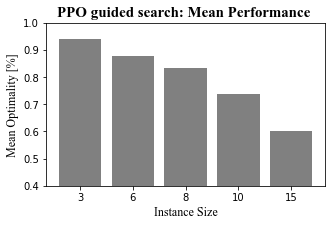

In [348]:
import statistics as s
sizes=[3,6,8,10,15]
bar_data=[]
save_folder='/Users/felix/sciebo/masterarbeit/progra/model-based_rl/plots/figures/ppo/ppo_search/'
for inst in sizes:
    df=pd.read_csv('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/eval_tree_search_'+str(inst)+'_inst_20_40_30sec.csv')
    #for inst in range(20,40):
    mean_reward=[]
    #identifier='inst_'+str(inst)+'checkpoint_'
    identifier='instance'
    data_new=df[df.columns[df.columns.str.contains(identifier)]].loc[0].squeeze().astype(np.float64).to_list()
    #print(data_new)
    #print(((data_new.loc[1].squeeze()).to_list()))
    mean_reward.append(s.mean(data_new))
    bar_data.append(max(mean_reward))

fig, ax = plt.subplots(figsize=(5,3))
plt.bar(list(map(str, sizes)),bar_data,color='grey')
plt.xlabel('Instance Size', fontdict=font)
plt.ylabel('Mean Optimality [%]', fontdict=font)
plt.title(f"PPO guided search: Mean Performance ", fontdict=font_2)
plt.ylim([0.4,1.00])
fig.savefig(save_folder+"ppo_test_bar_30s_08t.svg", bbox_inches="tight", pad_inches=0)
print(bar_data)
bar_data_comp=bar_data

[0.9404499726999727, 0.8699962809338285, 0.8226886351515036, 0.7252878701187038, 0.584520602775854]


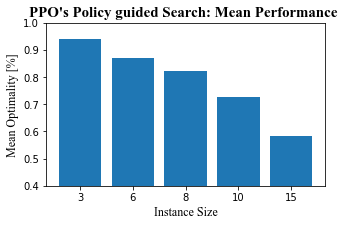

In [402]:
import statistics as s
sizes=[3,6,8,10,15]
bar_data=[]

for inst in sizes:
    df=pd.read_csv('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/eval_tree_search_'+str(inst)+'_inst_20_40_10sec.csv')
    #for inst in range(20,40):
    mean_reward=[]
    #identifier='inst_'+str(inst)+'checkpoint_'
    identifier='instance'
    data_new=df[df.columns[df.columns.str.contains(identifier)]].loc[0].squeeze().astype(np.float64).to_list()
    #print(data_new)
    #print(((data_new.loc[1].squeeze()).to_list()))
    mean_reward.append(s.mean(data_new))
    bar_data.append(max(mean_reward))

fig, ax = plt.subplots(figsize=(5,3))
plt.bar(list(map(str, sizes)),bar_data)
plt.xlabel('Instance Size', fontdict=font)
plt.ylabel('Mean Optimality [%]', fontdict=font)
plt.title(f"PPO's Policy guided Search: Mean Performance ", fontdict=font_2)
plt.ylim([0.4,1.00])
fig.savefig(save_folder+"ppo_test_bar_10s_08t.svg", bbox_inches="tight", pad_inches=0)

#fig.savefig("ppo_test_bar.svg", bbox_inches="tight", pad_inches=0)
print(bar_data)

(0.4, 1.0)

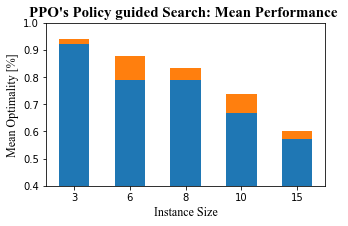

In [451]:

fig, ax = plt.subplots(figsize=(5,3))
x=list(map(str, sizes))
y1=bar_data_orig
y2=bar_data_comp
ax.bar(x, y2,width=0.55,color='tab:orange')
ax.bar(x, y1, width=0.55,color='tab:blue')
plt.xlabel('Instance Size', fontdict=font)
plt.ylabel('Mean Optimality [%]', fontdict=font)
plt.title(f"PPO's Policy guided Search: Mean Performance ", fontdict=font_2)
plt.ylim([0.4,1.00])
#for x_pos, (y1_pos, y2_pos) in zip(x, zip(y1, y2)):
#    label = y2_pos - y1_pos
#    ax.text(x_pos, y2_pos+5, f"{label}", ha="center", color="black")
#plt.legend('without','with guided search')
# Show the plot
#fig.savefig("ppo_test_adding_search.svg", bbox_inches="tight", pad_inches=0)


[0.9266231913731914, 0.8496817369872091, 0.8200230664493495, 0.7411086736272008, 0.6061514221909763]


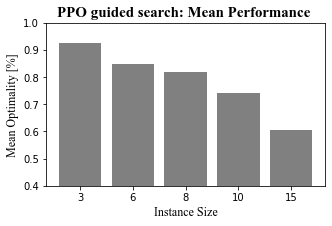

In [345]:
import statistics as s
sizes=[3,6,8,10,15]
bar_data=[]

for inst in sizes:
    df=pd.read_csv('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/eval_tree_search_'+str(inst)+'_inst_20_40_10sec_t09.csv')
    #for inst in range(20,40):
    mean_reward=[]
    #identifier='inst_'+str(inst)+'checkpoint_'
    identifier='instance'
    data_new=df[df.columns[df.columns.str.contains(identifier)]].loc[0].squeeze().astype(np.float64).to_list()
    #print(data_new)
    #print(((data_new.loc[1].squeeze()).to_list()))
    mean_reward.append(s.mean(data_new))
    bar_data.append(max(mean_reward))

fig, ax = plt.subplots(figsize=(5,3))
plt.bar(list(map(str, sizes)),bar_data,color='grey')
plt.xlabel('Instance Size', fontdict=font)
plt.ylabel('Mean Optimality [%]', fontdict=font)
plt.title(f"PPO guided search: Mean Performance ", fontdict=font_2)
plt.ylim([0.4,1.00])
fig.savefig(save_folder+"ppo_test_bar_10s_09t.svg", bbox_inches="tight", pad_inches=0)

#fig.savefig("ppo_test_bar.svg", bbox_inches="tight", pad_inches=0)
print(bar_data)

[0.9266231913731914, 0.8496817369872091, 0.8334578901395912, 0.7514512722050934, 0.6106686496186514]


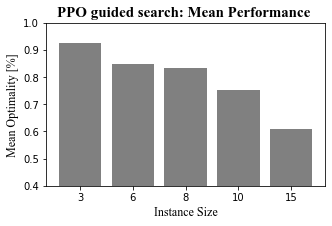

In [346]:
import statistics as s
sizes=[3,6,8,10,15]
bar_data=[]

for inst in sizes:
    df=pd.read_csv('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/eval_tree_search_'+str(inst)+'_inst_20_40_30sec_t09.csv')
    #for inst in range(20,40):
    mean_reward=[]
    #identifier='inst_'+str(inst)+'checkpoint_'
    identifier='instance'
    data_new=df[df.columns[df.columns.str.contains(identifier)]].loc[0].squeeze().astype(np.float64).to_list()
    #print(data_new)
    #print(((data_new.loc[1].squeeze()).to_list()))
    mean_reward.append(s.mean(data_new))
    bar_data.append(max(mean_reward))

fig, ax = plt.subplots(figsize=(5,3))
plt.bar(list(map(str, sizes)),bar_data,color='grey')
plt.xlabel('Instance Size', fontdict=font)
plt.ylabel('Mean Optimality [%]', fontdict=font)
plt.title(f"PPO guided search: Mean Performance ", fontdict=font_2)
plt.ylim([0.4,1.00])
fig.savefig(save_folder+"ppo_test_bar_30s_09t.svg", bbox_inches="tight", pad_inches=0)

#fig.savefig("ppo_test_bar.svg", bbox_inches="tight", pad_inches=0)
print(bar_data)

In [ ]:
import statistics as s
sizes=[3,6,8]
bar_data=[]

for inst in sizes:
    df=pd.read_csv('/Users/felix/sciebo/masterarbeit/progra/model-based_rl/eval_tree_search_'+str(inst)+'_inst_20_40_30sec_t05.csv')
    #for inst in range(20,40):
    mean_reward=[]
    #identifier='inst_'+str(inst)+'checkpoint_'
    identifier='instance'
    data_new=df[df.columns[df.columns.str.contains(identifier)]].loc[0].squeeze().astype(np.float64).to_list()
    #print(data_new)
    #print(((data_new.loc[1].squeeze()).to_list()))
    mean_reward.append(s.mean(data_new))
    bar_data.append(max(mean_reward))

fig, ax = plt.subplots(figsize=(5,3))
plt.bar(list(map(str, sizes)),bar_data,color='grey')
plt.xlabel('Instance Size', fontdict=font)
plt.ylabel('Mean Optimality [%]', fontdict=font)
plt.title(f"PPO guided search: Mean Performance ", fontdict=font_2)
plt.ylim([0.4,1.00])
fig.savefig(save_folder+"ppo_test_bar_30s_09t.svg", bbox_inches="tight", pad_inches=0)

#fig.savefig("ppo_test_bar.svg", bbox_inches="tight", pad_inches=0)
print(bar_data)

In [350]:
y1=bar_data_orig
y2=bar_data_comp
diff=[]
for i,j in zip(bar_data_comp,bar_data_orig):
    diff.append(i-j)
print(diff)

[0.019849508599508514, 0.08934421978776397, 0.04342367744780018, 0.06853523679213835, 0.028116898579124472]
